Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/06_Classification'
except ImportError as e:
    pass

## Exercise 6: Neural Networks

### 6.1. Learning a neural net with scikit-learn for the Adult dataset

In this task, you should create a neural network for the Adult dataset. Use the MLPClassifier provided by scikit-learn.

#### 6.1.1	Load the Adults dataset and play around with the hidden layers and the activation function (both are architecture parameters)

In [2]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder

adult_arff_data, adult_arff_meta = arff.loadarff(open('adult.arff', 'r'))
adult = pd.DataFrame(adult_arff_data)
adult = adult.applymap(lambda x: x.decode('utf8').replace("'", "") if hasattr(x, 'decode') else x)

adult_target = adult['class']
label_encoder = LabelEncoder()
adult_target = label_encoder.fit_transform(adult_target)
adult_data = adult.drop('class', axis=1)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States
4,18.0,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States


In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_features)])

In [4]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = \
    train_test_split(adult_data, adult_target, random_state=1234, stratify=adult_target, test_size = 5000)

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

for hidden_layers in [(2,), (50,), (50,50,50)]:
    print("=======" + str(hidden_layers) + "=======")
    clf = MLPClassifier(hidden_layer_sizes=hidden_layers, activation='relu',
                        learning_rate_init=1e-3, batch_size=128, verbose=True,
                        early_stopping=True, random_state=1234)

    pipeline = Pipeline([ ('preprocessing', preprocessor), ('estimator', clf) ])
    pipeline.fit(feature_train, target_train)

=======(2,)=======
Iteration 1, loss = 0.50598652
Validation score: 0.760775
Iteration 2, loss = 0.38130958
Validation score: 0.760775
Iteration 3, loss = 0.36121736
Validation score: 0.841277
Iteration 4, loss = 0.35077368
Validation score: 0.844926
Iteration 5, loss = 0.34341764
Validation score: 0.846294
Iteration 6, loss = 0.33804304
Validation score: 0.848347
Iteration 7, loss = 0.33400208
Validation score: 0.849487
Iteration 8, loss = 0.33114481
Validation score: 0.850627
Iteration 9, loss = 0.32889449
Validation score: 0.852223
Iteration 10, loss = 0.32720885
Validation score: 0.851539
Iteration 11, loss = 0.32577976
Validation score: 0.852223
Iteration 12, loss = 0.32429384
Validation score: 0.852452
Iteration 13, loss = 0.32326529
Validation score: 0.851767
Iteration 14, loss = 0.32229029
Validation score: 0.851767
Iteration 15, loss = 0.32124710
Validation score: 0.851995
Iteration 16, loss = 0.32033511
Validation score: 0.853592
Iteration 17, loss = 0.31959422
Validation sco

c:\users\tobi1\anaconda3\envs\dm1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


#### 6.1.2	Play around with the hyperparameters of the neural network like learning rate and batch size

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

for learning_rate in [1.0, 1e-3, 1e-6]:
    print("=========== lr: " + str(learning_rate) + "===========")
    clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                        learning_rate_init=learning_rate, batch_size=128, verbose=True,
                        early_stopping=True, random_state=1234)

    pipeline = Pipeline([ ('preprocessing', preprocessor), ('estimator', clf) ])

    pipeline.fit(feature_train, target_train)

=========== lr: 1.0===========
Iteration 1, loss = 0.73051827
Validation score: 0.765108
Iteration 2, loss = 0.59275133
Validation score: 0.430331
Iteration 3, loss = 0.65368506
Validation score: 0.765564
Iteration 4, loss = 0.67146553
Validation score: 0.763740
Iteration 5, loss = 0.71547136
Validation score: 0.765564
Iteration 6, loss = 0.69259752
Validation score: 0.765564
Iteration 7, loss = 0.70153249
Validation score: 0.765564
Iteration 8, loss = 0.69233873
Validation score: 0.765564


c:\users\tobi1\anaconda3\envs\dm1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


=========== lr: 0.001===========


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\tobi1\anaconda3\envs\dm1\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-bd8d74620bf7>", line 12, in <module>
    pipeline.fit(feature_train, target_train)
  File "c:\users\tobi1\anaconda3\envs\dm1\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\users\tobi1\anaconda3\envs\dm1\lib\site-packages\sklearn\pipeline.py", line 307, in _fit
    **fit_params_steps[name])
  File "c:\users\tobi1\anaconda3\envs\dm1\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "c:\users\tobi1\anaconda3\envs\dm1\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "c:\users\tobi1\anaconda3\envs\dm1\lib\site-packages\sklearn\compose\_column_transformer.py", l

TypeError: object of type 'NoneType' has no len()

If learning rate is set to high (like  1.0), training loss start diverging quickly.

If learning rate is too small (like 1e-6), then training is slow and may get stuck in a local minimum.

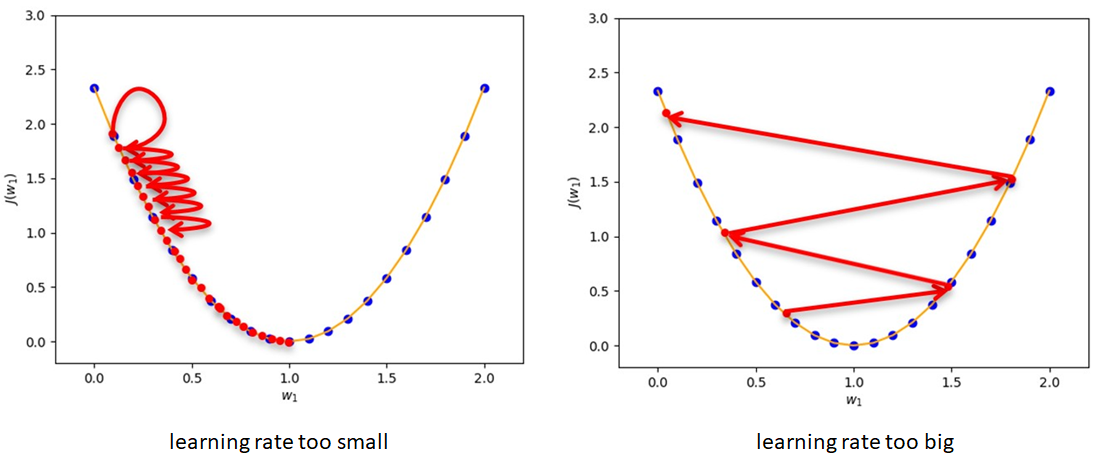

In [ ]:
#batch size which uses the full training (the default percentage is 0.9 train 0.1 validation):
import math
batch_gradient_descent = math.floor(len(feature_train)*0.9)

for batch_size in [16, 8192, batch_gradient_descent]:
    print("=========== batch_size: " + str(batch_size) + " ===========")
    clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                        learning_rate_init=1e-3, batch_size=batch_size, verbose=True,
                        early_stopping=True, random_state=1234)

    pipeline = Pipeline([ ('preprocessing', preprocessor), ('estimator', clf) ])

    pipeline.fit(feature_train, target_train)

If batch size would be set to 1, after each example the weights are updated (we do not include this here, because it takes too long) - this is also called stochastic gradient descent.

If batch size set to values greater than 1 and smaller than the number of examples this corresponds to mini-batch gradient descent. These batch sizes are usually powers of 2.

If batch size set to the number of examples, this corresponds to batch gradient descent.


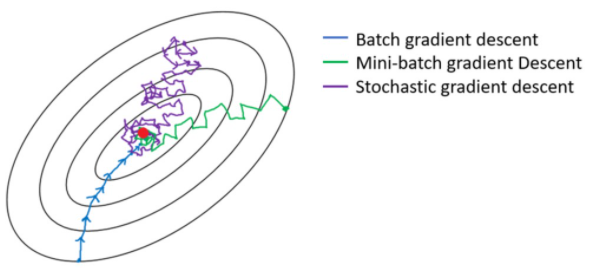

### 6.2. Neural networks with PyTorch Lightning

In the previous exercise only the MLPClassifier is used. To extend the possibilities, use PyTorch Lightning and create a similar neural network.

#### 6.1.1	Implement the same model in PyTorch Lightning and find an optimal model using F1 as the scoring measure.

In [ ]:
# due to the fact that we override the feature_train and target_train variable execute this cell only once
# or reun the cell with the first train_test_split again to initialize both variables again
feature_train, feature_validation, target_train, target_validation = \
    train_test_split(feature_train, target_train, random_state=1234, stratify=target_train, test_size = 5000)

In [ ]:
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# Now we have to preprocess the data ourselves because we do not use the pipeline
feature_train_processed = preprocessor.fit_transform(feature_train)
# important: we only call fit_transform for train and transform for test and validation
feature_validation_processed = preprocessor.transform(feature_validation)
feature_test_processed = preprocessor.transform(feature_test)

# convert data to tensors and create datasets
train_dataset = TensorDataset(torch.FloatTensor(feature_train_processed), torch.FloatTensor(target_train))
validation_dataset = TensorDataset(torch.FloatTensor(feature_validation_processed), torch.FloatTensor(target_validation))
test_dataset = TensorDataset(torch.FloatTensor(feature_test_processed), torch.FloatTensor(target_test))

# create dataloaders which will handle the batching
train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=128, shuffle=True)

In [ ]:
import pytorch_lightning as pl
import torch.nn as nn
from torch.nn import functional as F
import torchmetrics

class LightningModel(pl.LightningModule):
    
    def __init__(self):
        super().__init__()
        self.my_model = nn.Sequential(
            nn.Linear(107, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 1)
        )
        self.train_f1 = torchmetrics.F1()
        self.valid_f1 = torchmetrics.F1()
        self.test_f1 = torchmetrics.F1()

    def forward(self, x):
        logits = self.my_model(x)
        return logits

    def make_step(self, x,y):
        logits = self.forward(x)
        loss = F.binary_cross_entropy_with_logits(logits, y.unsqueeze(-1))
        predictions = torch.sigmoid(logits).squeeze()
        return loss, predictions
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        loss, predictions = self.make_step(x,y)
        self.train_f1(predictions, y.int())
        return {'loss' : loss}
    
    def training_epoch_end(self, training_step_outputs):
        avg_train_loss = torch.stack([x['loss'] for x in training_step_outputs]).mean()
        avg_train_f1 = self.train_f1.compute() 
        
        self.log("loss/train", avg_train_loss)
        self.log("f1/train", avg_train_f1)
        
        print('training loss at epoch ' + str(self.current_epoch) + ': ' + str(avg_train_loss.item()))
        
    def validation_step(self, batch, batch_idx):
        x, y = batch
        loss, predictions = self.make_step(x,y)
        
        self.valid_f1(predictions, y.int())
        return {'val_loss' : loss}
    
    def validation_epoch_end(self, validation_step_outputs):
        avg_val_loss = torch.stack([x['val_loss'] for x in validation_step_outputs]).mean()
        avg_val_f1 = self.valid_f1.compute()
        
        # need to log the validation accuracy, to be used as criterion for model selection
        # https://pytorch-lightning.readthedocs.io/en/stable/common/weights_loading.html
        self.log("loss/validation", avg_val_loss)
        self.log("f1/validation", avg_val_f1)
        
        print('validation F1 at epoch ' + str(self.current_epoch) + ': ' + str(avg_val_f1.item()))

    def test_step(self, batch, batch_idx):
        x, y = batch
        loss, predictions = self.make_step(x,y)
        test_f1_batch = self.test_f1(predictions, y.int())
        return test_f1_batch
    
    def test_epoch_end(self, test_step_outputs):
        avg_test_f1 = self.test_f1.compute()        
        self.log('f1/test', avg_test_f1)        
        return avg_test_f1
    
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-4)
        return optimizer

In [ ]:
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

# set a seed for all libraries such as random, numpy random etc
pl.seed_everything(42, workers=True)
model = LightningModel()

checkpoint_callback = ModelCheckpoint(dirpath='./checkpoints', monitor="f1/validation")
early_stop_callback = EarlyStopping(monitor="f1/validation", patience=10, mode="max")
trainer = pl.Trainer(deterministic=True, 
                     max_epochs=25,
                     callbacks=[checkpoint_callback, early_stop_callback])

trainer.fit(model, train_loader, validation_loader)

In [ ]:
trainer.test(model, test_loader, ckpt_path='best')

## 6.3. Multi class classification with PyTorch Lightning
Use the Connect 4 dataset to adjust the neural network for multi class classification
The target variable to predict is either ‘win’, ‘ loss’, or ‘ draw’.

#### 6.3.1 Load the dataset and split it into training, validation and test.

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

connect_four = pd.read_csv('connect-4.csv')

connect_four_target = connect_four['win']
label_encoder = LabelEncoder()
connect_four_target = label_encoder.fit_transform(connect_four_target)
connect_four_features = connect_four.drop('win', axis=1)
connect_four_features.head()

,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,...,b.24,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,b
1,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,b
2,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,b
3,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,b
4,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,o,b,b,b,b,b


In [8]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = \
    train_test_split(connect_four_features, connect_four_target, 
                     random_state=1234, stratify=connect_four_target, test_size = 5000)

feature_train, feature_validation, target_train, target_validation = \
    train_test_split(feature_train, target_train, random_state=42, stratify=target_train, test_size = 5000)


from sklearn.preprocessing import OneHotEncoder
encoder_one_hot = OneHotEncoder(sparse=False, handle_unknown='ignore')

feature_train_processed = encoder_one_hot.fit_transform(feature_train)
feature_validation_processed = encoder_one_hot.transform(feature_validation)
feature_test_processed = encoder_one_hot.transform(feature_test)


In [13]:
connect_four_target


array([2, 2, 2, ..., 1, 0, 0])

In [17]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# convert data to tensors and create datasets
train_dataset = TensorDataset(torch.FloatTensor(feature_train_processed), torch.LongTensor(target_train))
validation_dataset = TensorDataset(torch.FloatTensor(feature_validation_processed), torch.LongTensor(target_validation))
test_dataset = TensorDataset(torch.FloatTensor(feature_test_processed), torch.LongTensor(target_test))

# create dataloaders which will handle the batching
train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=128, shuffle=True)

#### 6.3.2 Adapt the architecture (change the loss and adapt the output layer) and optimize for validation accuracy.

In [18]:
class ConnectFourModel(pl.LightningModule):
    
    def __init__(self):
        super().__init__()
        self.my_model = nn.Sequential(
            nn.Linear(126, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 3)
        )
        self.train_acc = torchmetrics.Accuracy()
        self.valid_acc = torchmetrics.Accuracy()
        self.test_acc = torchmetrics.Accuracy()

    def forward(self, x):
        logits = self.my_model(x)
        return logits
    
    def make_step(self, x, y):        
        logits = self.forward(x)
        loss = F.cross_entropy(logits, y)
        predictions = torch.argmax(torch.softmax(logits, -1), -1)
        return logits, loss, predictions
        
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        logits, loss, predictions = self.make_step(x,y)
        self.train_acc(predictions, y)
        return {'loss' : loss}
    
    def training_epoch_end(self, training_step_outputs):
        avg_train_loss = torch.stack([x['loss'] for x in training_step_outputs]).mean()
        avg_train_acc = self.train_acc.compute() 
        
        self.log("loss/train", avg_train_loss)
        self.log("acc/train", avg_train_acc)
        
        print('training loss at epoch ' + str(self.current_epoch) + ': ' + str(avg_train_loss.item()))
        
    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits, loss, predictions = self.make_step(x, y)
        
        self.valid_acc(predictions, y)
        return {'val_loss' : loss} 
    
    def validation_epoch_end(self, validation_step_outputs):
        avg_val_loss = torch.stack([x['val_loss'] for x in validation_step_outputs]).mean()
        avg_val_acc = self.valid_acc.compute()
        
        self.log("loss/validation", avg_val_loss)
        self.log("acc/validation", avg_val_acc)
        
        print('validation accuracy at epoch ' + str(self.current_epoch) + ': ' + str(avg_val_acc.item()))

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits, loss, predictions = self.make_step(x, y)
        test_acc_batch = self.test_acc(predictions, y)
        return test_acc_batch
    
    def test_epoch_end(self, test_step_outputs):
        avg_test_acc = self.test_acc.compute()        
        self.log('acc/test', avg_test_acc)        
        return avg_test_acc

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-4)
        return optimizer

In [19]:
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

# set a seed for all libraries such as random, numpy random etc
pl.seed_everything(42, workers=True)
model = ConnectFourModel()


checkpoint_callback = ModelCheckpoint(dirpath='./checkpoints', monitor="acc/validation")
early_stop_callback = EarlyStopping(monitor="acc/validation", patience=10, mode="max")

trainer = pl.Trainer(deterministic=True, 
                     max_epochs=25,
                     callbacks=[checkpoint_callback, early_stop_callback])

trainer.fit(model, train_loader, validation_loader)

Global seed set to 42
C:\tools\Anaconda3\envs\dm1\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:446: UserWarning: Checkpoint directory ./checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
-----------------------------------------
0 | my_model  | Sequential | 17.9 K
1 | train_acc | Accuracy   | 0     
2 | valid_acc | Accuracy   | 0     
3 | test_acc  | Accuracy   | 0     
-----------------------------------------
17.9 K    Trainable params
0         Non-trainable params
17.9 K    Total params
0.072     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

C:\tools\Anaconda3\envs\dm1\lib\site-packages\pytorch_lightning\trainer\data_loading.py:376: UserWarning: Your val_dataloader has `shuffle=True`, it is best practice to turn this off for val/test/predict dataloaders.
  rank_zero_warn(
C:\tools\Anaconda3\envs\dm1\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
Global seed set to 42


validation accuracy at epoch 0: 0.66015625


C:\tools\Anaconda3\envs\dm1\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 0: 0.7701674103736877
training loss at epoch 0: 0.6422841548919678


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 1: 0.7864664793014526
training loss at epoch 1: 0.5170997381210327


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 2: 0.79542475938797
training loss at epoch 2: 0.47750258445739746


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 3: 0.8013921976089478
training loss at epoch 3: 0.45433175563812256


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 4: 0.8051552176475525
training loss at epoch 4: 0.43936091661453247


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 5: 0.8093270659446716
training loss at epoch 5: 0.4298535883426666


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 6: 0.8106704950332642
training loss at epoch 6: 0.41820424795150757


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 7: 0.8129719495773315
training loss at epoch 7: 0.40788504481315613


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 8: 0.8150521516799927
training loss at epoch 8: 0.4004359245300293


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 9: 0.8167781233787537
training loss at epoch 9: 0.39535951614379883


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 10: 0.8181192874908447
training loss at epoch 10: 0.3885088860988617


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 11: 0.8195532560348511
training loss at epoch 11: 0.383260577917099


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 12: 0.8210126161575317
training loss at epoch 12: 0.37875041365623474


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 13: 0.8223781585693359
training loss at epoch 13: 0.37477490305900574


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 14: 0.8233363628387451
training loss at epoch 14: 0.37037986516952515


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 15: 0.8236767053604126
training loss at epoch 15: 0.3653618395328522


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 16: 0.8246926665306091
training loss at epoch 16: 0.36285701394081116


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 17: 0.8252858519554138
training loss at epoch 17: 0.35755330324172974


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 18: 0.8262681365013123
training loss at epoch 18: 0.357380747795105


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 19: 0.8271923661231995
training loss at epoch 19: 0.3539595603942871


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 20: 0.8281047940254211
training loss at epoch 20: 0.35115593671798706


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 21: 0.8285989165306091
training loss at epoch 21: 0.34537503123283386


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 22: 0.8294058442115784
training loss at epoch 22: 0.34645316004753113


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 23: 0.8298130631446838
training loss at epoch 23: 0.34064745903015137


Validating: 0it [00:00, ?it/s]

validation accuracy at epoch 24: 0.8303315043449402
training loss at epoch 24: 0.34010136127471924


In [20]:
trainer.test(model, test_loader, ckpt_path='best')

C:\tools\Anaconda3\envs\dm1\lib\site-packages\pytorch_lightning\trainer\data_loading.py:376: UserWarning: Your test_dataloader has `shuffle=True`, it is best practice to turn this off for val/test/predict dataloaders.
  rank_zero_warn(
C:\tools\Anaconda3\envs\dm1\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'acc/test': 0.8348000049591064}
--------------------------------------------------------------------------------


[{'acc/test': 0.8348000049591064}]